# Understanding Descriptive Statistics

Import the necessary libraries here:

In [7]:
# Libraries
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [5]:
# your code here
def dice_rolls(num_rolls=10):
    # 10 times example
    dice_rolls = [random.randint(1, 6) for _ in range(num_rolls)]

    df = pd.DataFrame({'Roll': range(1, num_rolls + 1), 'Dice Value': dice_rolls})
    return df


In [6]:
dice_rolls_df = dice_rolls()
dice_rolls_df

,Roll,Dice Value
0,1,5
1,2,3
2,3,6
3,4,1
4,5,2
5,6,4
6,7,5
7,8,3
8,9,3
9,10,6


#### 2.- Plot the results sorted by value.

In [10]:
# your code here
df = dice_rolls(num_rolls=10)
sorted_df = df['Dice Value'].value_counts().sort_index()

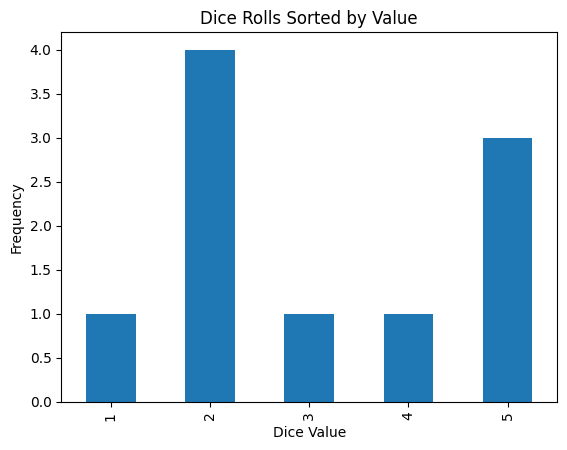

In [11]:
sorted_df.plot(kind='bar', xlabel='Dice Value', ylabel='Frequency', title='Dice Rolls Sorted by Value')
plt.show()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

In [13]:
# your code here
dice_df = dice_rolls()
frequency_distribution = dice_df['Dice Value'].value_counts().sort_index()


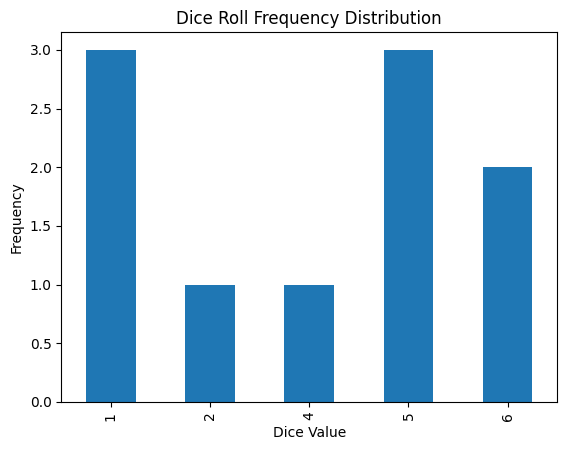

In [14]:
frequency_distribution.plot(kind='bar')
plt.xlabel('Dice Value')
plt.ylabel('Frequency')
plt.title('Dice Roll Frequency Distribution')
plt.show()

In [ ]:
"""
we can see that the frequency distribution plot shows us how often each value (1 to 6) appeared in our 10 dice rolls.
on the other hand, the earlier plot, where we sorted the results by their values, showed us something else. It basically displayed the order of our 10 rolls, from the first to the last.
"""

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles.

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value.

In [ ]:
# your code here - a very manual way to get it. Not sure if this was actually the request as it does not look very smooth to me.
def calculate_mean(observations):
    total_sum = sum(observations)
    total_count = len(observations)
    mean = total_sum / total_count
    return mean


#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value.

In [15]:
# your code here - same comment as before. is this correct? looking forward to your comments Bets.
def calculate_mean_from_frequency_distribution(freq_dist):
    total_sum = sum(value * freq for value, freq in freq_dist.items())
    total_count = sum(freq_dist.values())
    mean = total_sum / total_count
    return mean


#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value.
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [16]:
# your code here - not sure about how well I am replying to this challenge.
def calculate_median(data):
    sorted_data = sorted(data)
    n = len(data)

    if n % 2 == 1:
        median = sorted_data[n // 2]
    else:
        middle1 = sorted_data[n // 2 - 1]
        middle2 = sorted_data[n // 2]
        median = (middle1 + middle2) / 2

    return median

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles.

In [17]:
# your code here
def calculate_quartiles(data):
    sorted_data = sorted(data)
    n = len(data)

    q2 = calculate_median(sorted_data)

    lower_half = sorted_data[:n // 2] if n % 2 == 0 else sorted_data[:n // 2]
    upper_half = sorted_data[n // 2 + 1:] if n % 2 == 0 else sorted_data[n // 2 + 1:]

    q1 = calculate_median(lower_half)
    q3 = calculate_median(upper_half)

    return q1, q2, q3


## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [19]:
# your code here
data = pd.read_csv('/content/roll_the_dice_hundred.csv')
sorted_data = data['value'].sort_values()

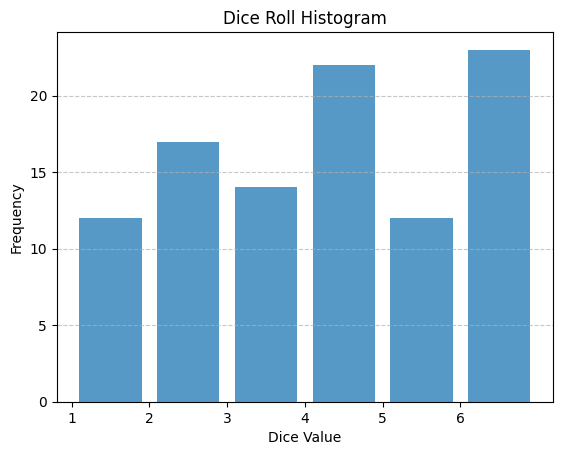

In [21]:
plt.hist(data['value'], bins=range(1, 8), rwidth=0.8, alpha=0.75)
plt.title('Dice Roll Histogram')
plt.xlabel('Dice Value')
plt.ylabel('Frequency')
plt.xticks(range(1, 7))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
"""
the frequency of 4 and 6 are the highest
"""

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [26]:
# your code here
mean_value = data['value'].mean()
mean_value

3.74

#### 3.- Now, calculate the frequency distribution.


In [27]:
# your code here
frequency_distribution = data['value'].value_counts().sort_index()
frequency_distribution

1    12
2    17
3    14
4    22
5    12
6    23
Name: value, dtype: int64

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram?

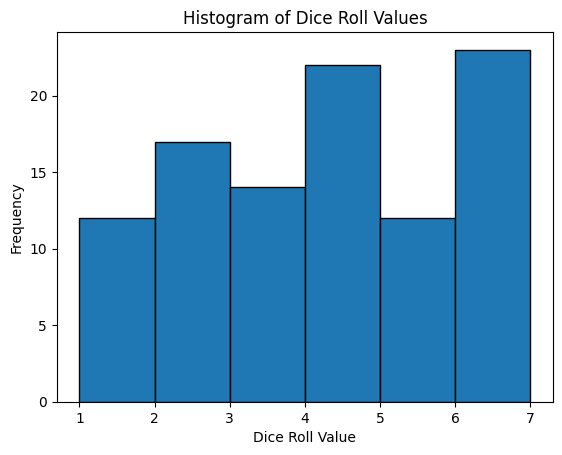

In [28]:
# your code here
plt.hist(data['value'], bins=range(1, 8), edgecolor='black')
plt.xlabel('Dice Roll Value')
plt.ylabel('Frequency')
plt.title('Histogram of Dice Roll Values')
plt.show()

In [ ]:
"""
In a situation like this, where all dice values have an equal chance, the average (mean) is like the middle point of the possible values. Since the dice goes from 1 to 6, the average should be about 3.5.
It means that, on average, we will likely roll a value close to 3.5.
"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [29]:
# your code here
data_thousands = pd.read_csv('/content/roll_the_dice_thousand.csv')
sorted_data = data_thousands['value'].sort_values()

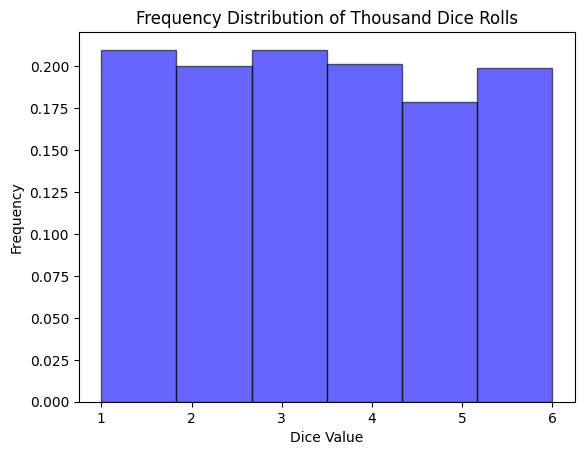

In [30]:
plt.hist(sorted_data, bins=6, density=True, alpha=0.6, color='b', edgecolor='black')
plt.xlabel('Dice Value')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Thousand Dice Rolls')
plt.show()

In [ ]:
"""
What we'll see is that the histogram will appear even closer to a uniform distribution because, with a larger sample size (a thousand rolls),
the results tend to come closer to the expected probabilities of a fair six-sided die.
"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot.

In [35]:
# your code here
data_ages_population = pd.read_csv('/content/ages_population.csv')



In [36]:
data_ages_population.head()

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0


In [46]:
freq_distribution = data_ages_population['observation'].value_counts()
freq_distribution.head()

39.0    45
41.0    36
30.0    34
35.0    33
43.0    32
Name: observation, dtype: int64

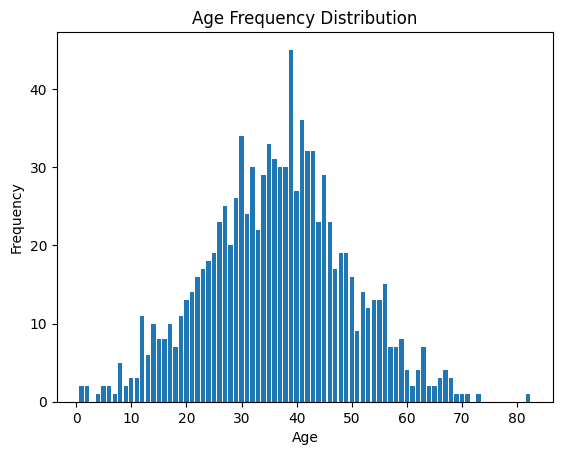

In [39]:
plt.bar(freq_distribution.index, freq_distribution)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Frequency Distribution')
plt.show()

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [40]:
# your code here
mean_age = data_ages_population['observation'].mean()
std_age = data_ages_population['observation'].std()



In [42]:
print(mean_age, std_age)

36.56 12.81649962597677


In [ ]:
"""
I could not make any guess to be honest nor I am sure how can I make it withougt working out the data as I did here
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [43]:
# your code here
data_ages_population2 = pd.read_csv('/content/ages_population2.csv')

In [49]:
freq_distribution = data_ages_population2['observation'].value_counts()
freq_distribution.head()

28.0    139
27.0    125
26.0    120
29.0    115
25.0     98
Name: observation, dtype: int64

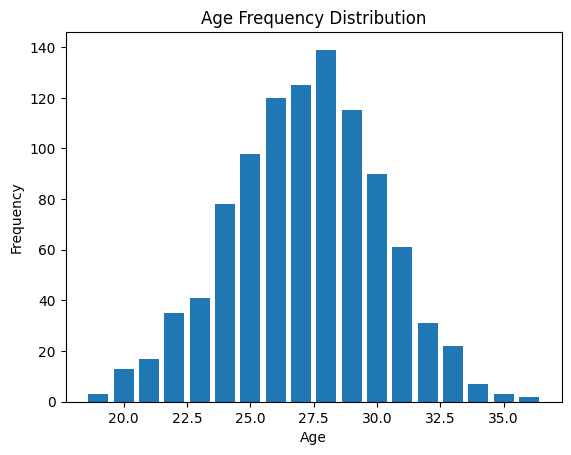

In [50]:
#lets plot it
plt.bar(freq_distribution.index, freq_distribution)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Frequency Distribution')
plt.show()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
lower age range but a higher frequency - main difference i can see
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [51]:
# your code here
mean_age = data_ages_population2['observation'].mean()
std_age = data_ages_population2['observation'].std()

In [52]:
print(mean_age, std_age)

27.155 2.9698139326891835


In [ ]:
"""
I am not sure how to respond to this question. if any direction Bets, I would appreciate it. Then I can come back to this question with the proper context
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [53]:
# your code here
data_ages_population3 = pd.read_csv('/content/ages_population3.csv')

In [54]:
freq_distribution = data_ages_population3['observation'].value_counts()
freq_distribution.head()

32.0    37
35.0    31
37.0    31
39.0    29
36.0    26
Name: observation, dtype: int64

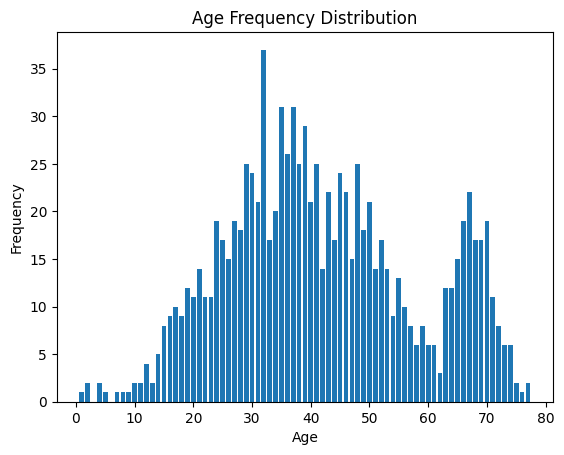

In [55]:
#lets plot it
plt.bar(freq_distribution.index, freq_distribution)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Frequency Distribution')
plt.show()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [56]:
# your code here
mean_age = data_ages_population3['observation'].mean()
std_age = data_ages_population3['observation'].std()

In [57]:
print(mean_age, std_age)

41.989 16.14470595986593


In [ ]:
"""
I can observe a higher mean and std deviation. The ages are much more spread than in step 1
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [58]:
# your code here
quartiles = data_ages_population3['observation'].quantile([0.25, 0.5, 0.75])
q1, median, q3 = quartiles[0.25], quartiles[0.5], quartiles[0.75]

In [59]:
mean_age = data_ages_population3['observation'].mean()

In [61]:
difference = median - mean_age

-1.9889999999999972

In [63]:
# summary
print("1st Quartile (Q1):", q1)
print("Median (Q2):", median)
print("3rd Quartile (Q3):", q3)
print("Mean:", mean_age)
print("Difference between Median and Mean:", difference)

1st Quartile (Q1): 30.0
Median (Q2): 40.0
3rd Quartile (Q3): 53.0
Mean: 41.989
Difference between Median and Mean: -1.9889999999999972


#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [65]:
# your code here
percentiles = data_ages_population['observation'].quantile([0.1, 0.9, 0.95, 0.99])
percentiles

0.10    20.0
0.90    53.0
0.95    58.0
0.99    67.0
Name: observation, dtype: float64

In [ ]:
"""
as an example: percentile 99 --> only 1% of the population has an age greater than or equal to 67. Not sure what is expected out of this request. I can ellaborate other reasonings like:
percentile 95: 95% of the population is at or below this age
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here. I do not think i need any further code right?

In [ ]:
"""
Similar areas:
1) all neighboorhoods have a mean age within a similar range

Differences
1) Neighboorhood 1 --> highest mean - older residents
2) NH 2 --> narrowest age spread - younger population
3) N3 --> in the middle of the other 2
"""